In [36]:
#importing all necessary librarires
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split

In [37]:
#Reading the data set
df = pd.read_csv('datasets/hours-score.csv')
df

,Hours,Scores
0,1.0,25
1,2.0,45
2,3.0,50
3,4.0,65
4,5.0,75
5,1.5,30
6,2.5,48
7,3.5,55
8,4.5,70
9,5.5,78


In [38]:
# ✅ Splitting features and labels

# Option 1: Using iloc
# X = df.iloc[:, :-1]
# y = df.iloc[:, -1]

#option 2: using drop()
X = df.drop('Scores',axis=1)
y= df['Scores']

In [39]:
X

,Hours
0,1.0
1,2.0
2,3.0
3,4.0
4,5.0
5,1.5
6,2.5
7,3.5
8,4.5
9,5.5


In [40]:
X.shape

(10, 1)

In [41]:
y

0    25
1    45
2    50
3    65
4    75
5    30
6    48
7    55
8    70
9    78
Name: Scores, dtype: int64

In [42]:
y.shape

(10,)

<Axes: xlabel='Hours', ylabel='Scores'>

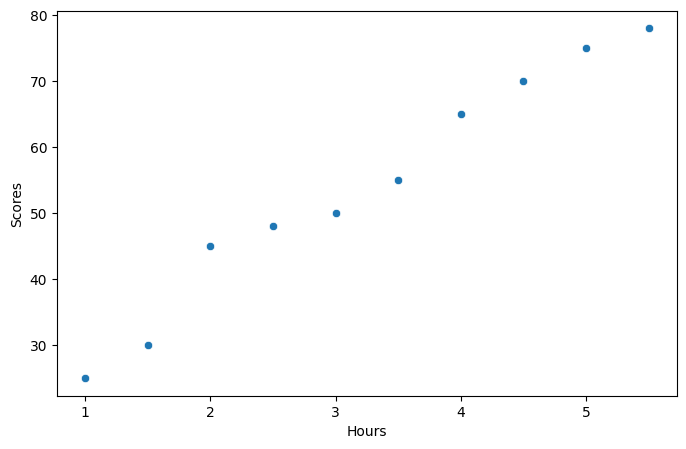

In [43]:
# 🎯 Visualizing the relationship between Hours and Scores
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['Hours'],y=df['Scores'],data=df)

In [44]:
#trian_test_spli

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)


In [45]:
X_train

,Hours
5,1.5
0,1.0
7,3.5
2,3.0
3,4.0
6,2.5
9,5.5
8,4.5


In [46]:
X_train.shape

(8, 1)

In [47]:
X_test

,Hours
4,5.0
1,2.0


In [48]:
X_test.shape

(2, 1)

In [49]:
y_train

5    30
0    25
7    55
2    50
3    65
6    48
9    78
8    70
Name: Scores, dtype: int64

In [50]:
y_train.shape

(8,)

In [51]:
y_test

4    75
1    45
Name: Scores, dtype: int64

In [52]:
y_test.shape

(2,)

In [53]:
#creating a Linear Regression()
model = LinearRegression()

#fitting the model to training data
model.fit(X_train, y_train)

LinearRegression()

In [54]:
model.intercept_

np.float64(13.788649706457903)

In [55]:
model.coef_

array([12.18395303])

In [56]:
#Predict on test data
y_pred = model.predict(X_test)
y_pred

array([74.70841487, 38.15655577])

In [57]:
#evaluating the model

mse = mean_squared_error(y_test, y_pred)

r2 = r2_score(y_test, y_pred)

print(f"Mean squared error: {mse}")
print(f"r2 score: {r2}")

Mean squared error: 23.458875387272595
r2 score: 0.8957383316121218


In [58]:
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison)


   Actual  Predicted
4      75  74.708415
1      45  38.156556


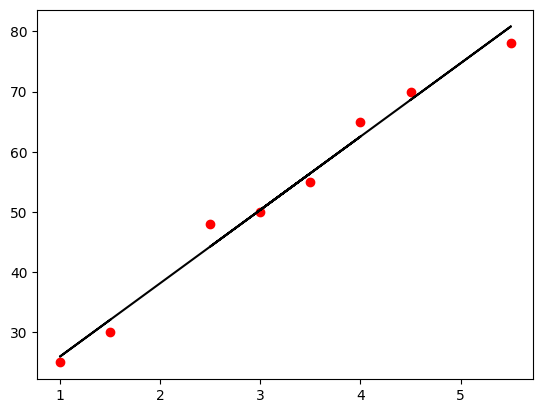

In [59]:
plt.scatter(X_train, y_train,color='r')
plt.plot(X_train, model.predict(X_train), color='k')
plt.show()

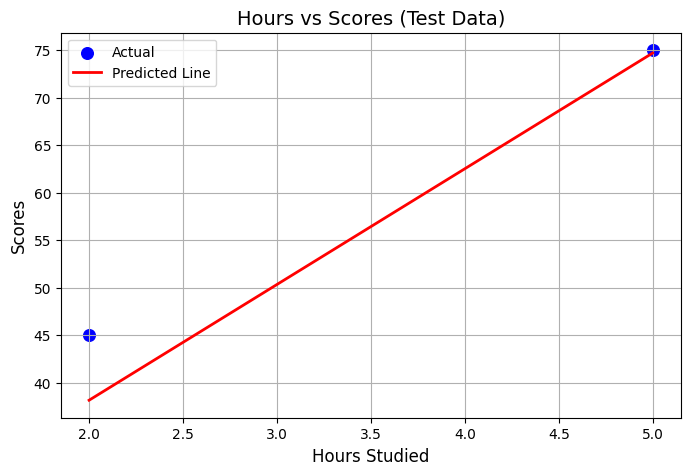

In [60]:
# Plotting the original data points
plt.figure(figsize=(8, 5))
plt.scatter(X_test,y_test,color='blue',label='Actual', s=70)

# Plotting the regression line
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted Line')

# Labels and title
plt.title('Hours vs Scores (Test Data)', fontsize=14)
plt.xlabel('Hours Studied', fontsize=12)
plt.ylabel('Scores', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()
